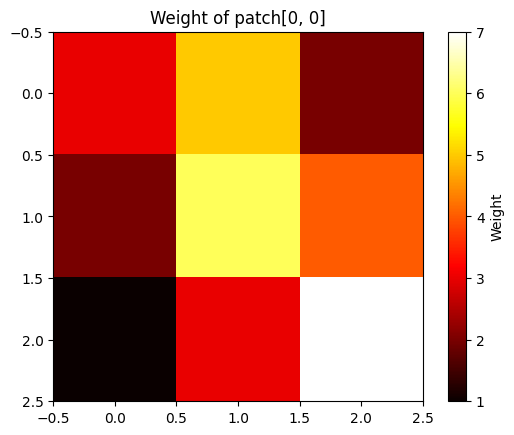

In [1]:
import numpy as np

def merge_patches(patches, origin_H, origin_W, overlap_size=4):
    patch_size = patches.shape[2]
    padded_image = np.zeros((origin_H + 2 * overlap_size, origin_W + 2 * overlap_size, 3), dtype=np.float32)
    count_matrix = np.zeros((origin_H + 2 * overlap_size, origin_W + 2 * overlap_size, 3), dtype=np.float32)
    
    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
            x_start = i * (patch_size - overlap_size)
            y_start = j * (patch_size - overlap_size)
            
            # Crop the patch to remove the faded edges
            patch = patches[i][j]
            
            for oi in range(patch_size):
                for oj in range(patch_size):
                    padded_image[x_start + oi, y_start + oj] += patch[oi, oj]
                    count_matrix[x_start + oi, y_start + oj] += 1.0
    
    count_matrix[count_matrix == 0.0] = 1.0
    restored_image = padded_image / count_matrix
    restored_image = restored_image[overlap_size:origin_H + overlap_size, overlap_size:origin_W + overlap_size]
    
    plt.imshow(count_matrix, cmap='hot', interpolation='nearest')
    return np.clip(restored_image, 0, 255).astype(np.uint8)


import numpy as np
import matplotlib.pyplot as plt

# 예시 count_matrix (임의의 값)
count_matrix = np.array([[3, 5, 2],
                         [2, 6, 4],
                         [1, 3, 7]])

# patch[0, 0]에서의 가중치 시각화
plt.imshow(count_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Weight')
plt.title("Weight of patch[0, 0]")
plt.show()
